In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from src.data.data_loader import audio_loader


In [2]:
y, sr = audio_loader('/data/audio/snare_example.wav')

In [3]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

C:\Users\Caléo\AppData\Local\Temp\ipykernel_9948\473892238.py:1: FutureWarning: Pass y=[-4.8961798e-03 -1.6251264e-02 -5.2345697e-02 ...  6.2521122e-04
  3.7365913e-05 -8.4299580e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
c:\Users\Caléo\OneDrive\TCC\IC\tempo_estimation_emd\.venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


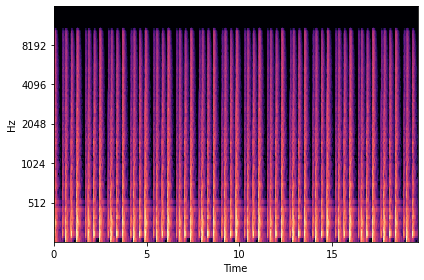

In [4]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [5]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

In [6]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

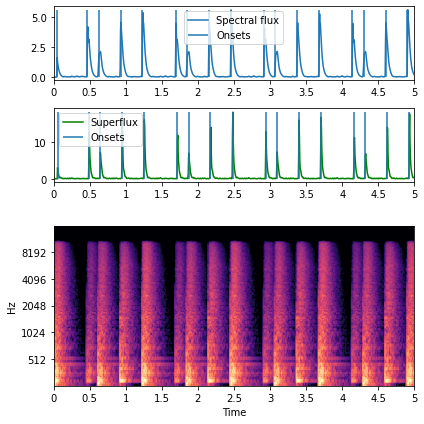

In [7]:
# sphinx_gallery_thumbnail_number = 2
plt.figure(figsize=(6, 6))

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

ax = plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.xlim([0, 5.0])
plt.axis('tight')


plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.xlim([0, 5.0])
plt.legend()


plt.subplot(4, 1, 2, sharex=ax)
plt.plot(frame_time, odf_sf, color='g', label='Superflux')
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')
plt.xlim([0, 5.0])
plt.legend()

plt.tight_layout()
plt.show()